In [1]:
from subprocess import Popen, PIPE
import pandas as pd
import seaborn as sns
import os

os.environ["RUST_BACKTRACE"] = "1"

In [2]:
GAME_INFO_FILE = "./examples/board.json"
RESULT_FILE = "./examples/board_result.csv"

ITERATION = 5000
SIMULATE_TURN = 200
PLAYER_NUM = 2

In [3]:
proc = Popen(["cargo", "run"], stdin=PIPE, stdout=PIPE)
_ = proc.communicate(f"load {GAME_INFO_FILE}\nanalyze {RESULT_FILE} {ITERATION} {SIMULATE_TURN}\nexit\n".encode())

    Finished dev [unoptimized + debuginfo] target(s) in 0.09s
     Running `target/debug/monopolizer`


In [4]:
data = pd.read_csv(RESULT_FILE)
data.describe()

,turn,player,money,tap
count,2.000000e+06,2000000.0,2.000000e+06,2.000000e+06
mean,1.005000e+02,0.5,1.944818e+03,2.082256e+03
std,5.773432e+01,0.5,1.708741e+03,1.814959e+03
min,1.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,5.075000e+01,0.0,0.000000e+00,0.000000e+00
50%,1.005000e+02,0.5,1.755000e+03,1.928000e+03
75%,1.502500e+02,1.0,3.358000e+03,3.924000e+03
max,2.000000e+02,1.0,8.617000e+03,8.628000e+03


In [5]:
data.head()

,turn,player,money,tap
0,1,0,1500,1148
1,1,1,1635,1203
2,2,0,1550,1148
3,2,1,1585,1203
4,3,0,1375,1148


<AxesSubplot: xlabel='turn', ylabel='money'>

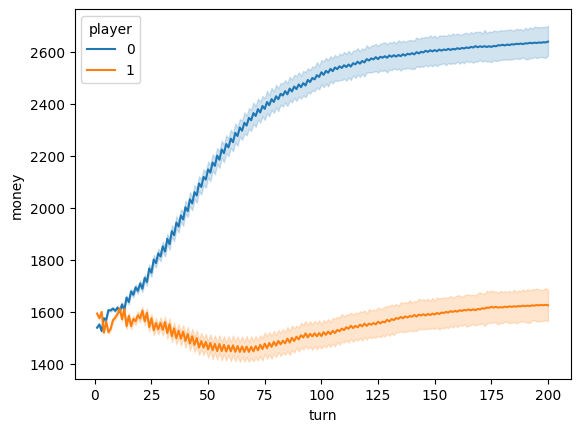

In [6]:
sns.lineplot(x="turn", y="money", hue="player", data=data)

<AxesSubplot: xlabel='turn', ylabel='tap'>

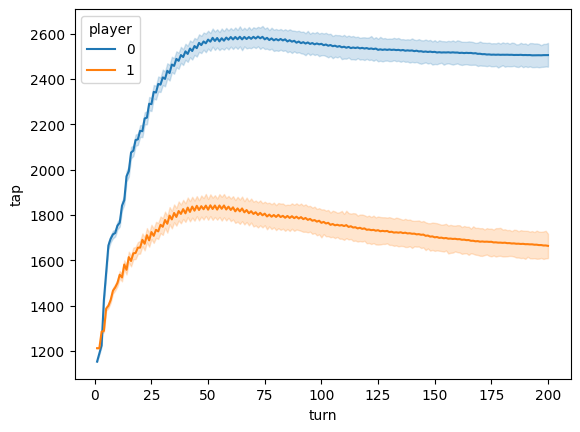

In [7]:
sns.lineplot(x="turn", y="tap", hue="player", data=data)

In [8]:
bankrupted = data.loc[(data["turn"] == SIMULATE_TURN) & (data["money"] == 0) & (data["tap"] == 0)]

for player in range(PLAYER_NUM):
    bankrupted_num = len(bankrupted.loc[data["player"] == player])
    print(f"Player{player} Survival rate: {(1 - bankrupted_num / ITERATION) * 100:.1f}% ({ITERATION - bankrupted_num}/{ITERATION})")

Player0 Survival rate: 65.5% (3276/5000)
Player1 Survival rate: 38.0% (1899/5000)
